In [1]:
# トイデータを使った LDA の推論テスト

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=100, linewidth=200)
#np.set_printoptions(threshold=sys.maxsize, linewidth=200)

from pprint import pprint
from tqdm import tqdm

from test_utils import generate_lda_toy_data, assign_phi, assign_theta, plot_phi, plot_theta

In [3]:
D = 1000 # 文書数
V = 100  # 語彙数
K = 5    # トピック数
alpha = 1.0  # トピック分布の共役事前分布のハイパーパラメータ
beta  = 1.0  # 語彙分布の共役事前分布のハイパーパラメータ

generate_lda_toy_data(D, V, K, alpha=alpha, beta=beta, seed=123)

generating...


100%|██████████| 1000/1000 [00:05<00:00, 176.00it/s]


{'K': 5,
 'alpha': 1.0,
 'beta': 1.0,
 'phi': array([[0.00841513, 0.00275464, 0.01963053, ..., 0.0071981 , 0.02979759, 0.0044797 ],
        [0.00442285, 0.01253262, 0.00665678, ..., 0.01118651, 0.00460077, 0.00208758],
        [0.01943387, 0.00214249, 0.00821572, ..., 0.01369453, 0.00905449, 0.01190491],
        [0.00883959, 0.01180355, 0.00389859, ..., 0.01052288, 0.01468546, 0.00967758],
        [0.02435371, 0.04021486, 0.00043271, ..., 0.00216879, 0.01245777, 0.01000887]]),
 'theta': array([[0.30894856, 0.08734291, 0.06666896, 0.2076722 , 0.32936737],
        [0.08078721, 0.5802404 , 0.16957052, 0.09629893, 0.07310294],
        [0.14633129, 0.45458744, 0.20096238, 0.02142105, 0.17669784],
        ...,
        [0.29445793, 0.3934804 , 0.12332177, 0.00267695, 0.18606295],
        [0.10434347, 0.5546568 , 0.04513363, 0.01267345, 0.28319265],
        [0.15113003, 0.09596685, 0.12259945, 0.62054078, 0.00976289]])}

In [4]:
!head -n5 ./lda.test.txt

51 0 27 24 41 48 43 39 21 76 27 6 86 43 26 86 93 0 42 49 15 28 65 65 61 98 21 65 88 57 86 61 40 64 87 12 4 9 53 24 61 95 76 90 9 0 10 91 4 59 42 41 80 86 93 68 49 7 46 90 41 25 29 28 68 49 59 62 41 59 27 32 27 35 21 15 51 28 14 48 20 0 21 43 94 75 80 25 32 64 74 13 17 7 36 97 45 48 54 80 0 80 61 2 52 84 62 21 37 62 65 9 90 48 43 85 61 79 40 25 1 10 91 70 60 87 64 37 25 38 71 70 41 46 17 53 1 27 35 8 8 60 9 49 86 37 31
23 71 29 23 39 50 41 88 59 60 50 77 83 82 37 85 97 73 60 84 51 81 80 57 18 20 8 6 44 69 55 83 82 97 58 7 83 43 74 58 93 76 23 20 50 80 39 76 59 8 51 72 82 13 47 11 38 18 83 1 9 39 39 64 53 27 89 25 98 94 38 83 30 40 98 84 37 86 25 64 90 16 59 45 12 12 67 50 72 97 1 43 57 4 59 7 12 85 87 82 72 59 7 43 69 26 29 24 25 18 6 41 85 24 19 18 7 1 50 27 44 31 65 15 63
93 85 62 86 33 8 57 90 98 33 86 56 88 87 70 43 18 48 32 14 83 7 17 75 98 89 87 88 96 15 2 59 56 76 54 35 60 18 82 92 85 8 82 82 27 54 40 59 37 54 62 68 46 18 8 35 8 33 25 84 62 87 70 72 99 57 49 14 65 23 91 41 39 11 

In [5]:
params = np.load("./lda.test.params.npz")
_, true_alpha, true_beta, true_phi, true_theta = int(params["K"]), float(params["alpha"]), float(params["beta"]), params["phi"], params["theta"]

In [6]:
# LDA を実行
from cytm.lda import LDA

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

lda = LDA("./lda.test.txt", word2id="./lda.test.word2id.txt", K=5, alpha=1, beta=1, n_iter=1000)

2025-04-10 22:14:28,761 : INFO : Corpus: 1000 docs, 149790 words, 100 vocab.
2025-04-10 22:14:28,762 : INFO : Number of topics: 5
2025-04-10 22:14:28,762 : INFO : alpha: 1.000
2025-04-10 22:14:28,763 : INFO : beta: 1.000
2025-04-10 22:14:28,764 : INFO : Running Gibbs sampling inference
2025-04-10 22:14:28,764 : INFO : Number of sampling iterations: 1000


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-04-10 22:14:49,954 : INFO : Sampling completed! Elapsed 21.1679 sec ppl=258.834


In [7]:
# 推定分布を KL ダイバージェンスをヒントに真の分布に割り当て（マッピング）
assign, phi = assign_phi(true_phi, lda["phi"].T)


Topic Matching (True -> Estimated):
True Topic 0 matched with Estimated Topic 0 | KL Divergence: 0.0295
True Topic 1 matched with Estimated Topic 1 | KL Divergence: 0.0188
True Topic 2 matched with Estimated Topic 2 | KL Divergence: 0.0273
True Topic 3 matched with Estimated Topic 4 | KL Divergence: 0.0365
True Topic 4 matched with Estimated Topic 3 | KL Divergence: 0.0327

Mean KL Divergence after optimal topic matching: 0.0290


In [8]:
# 割り当てられたトピック番号をつかってトピック分布を更新
theta = assign_theta(lda["theta"], assign)

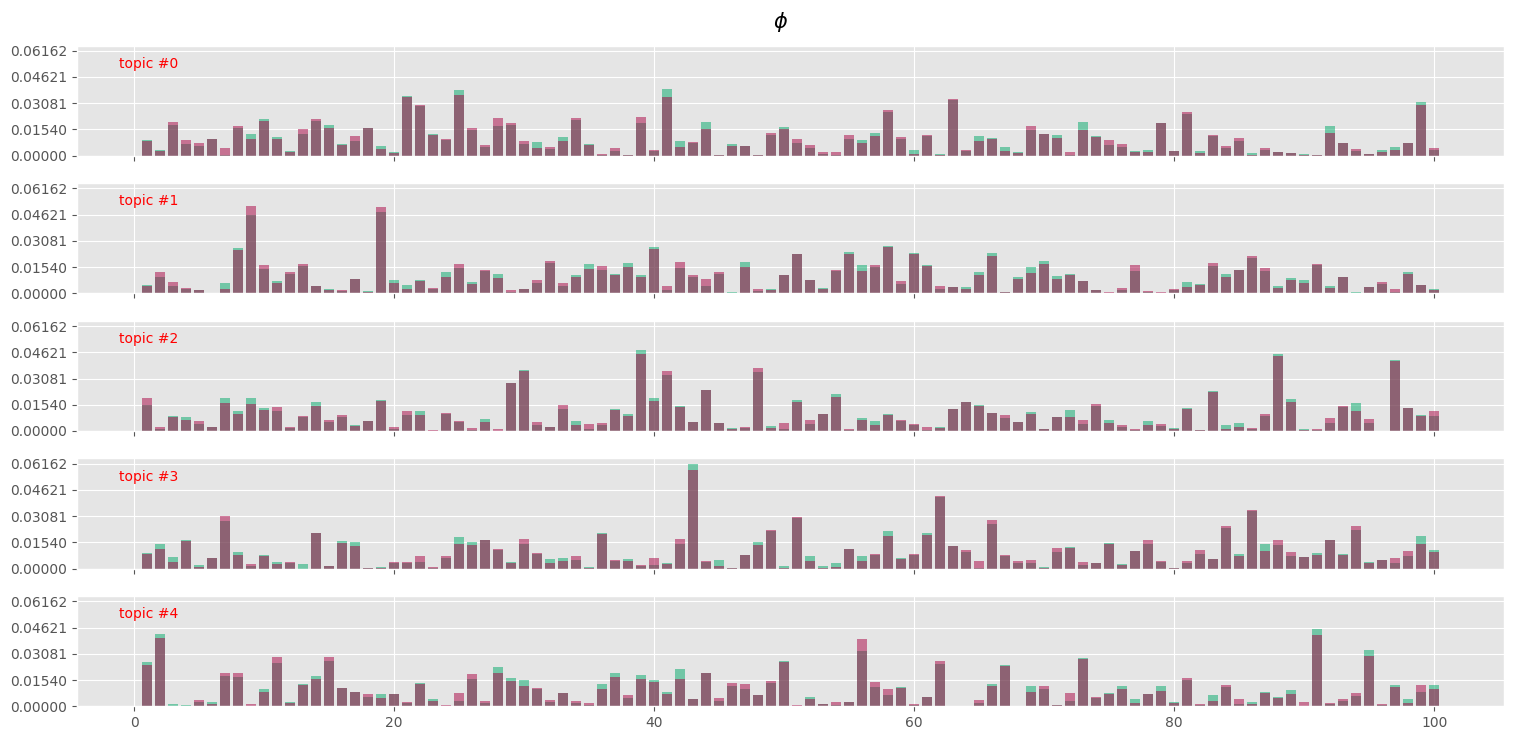

In [9]:
# 真の分布と推定分布の比較（語彙分布）
plot_phi(phi, true_phi, n_rows=5)

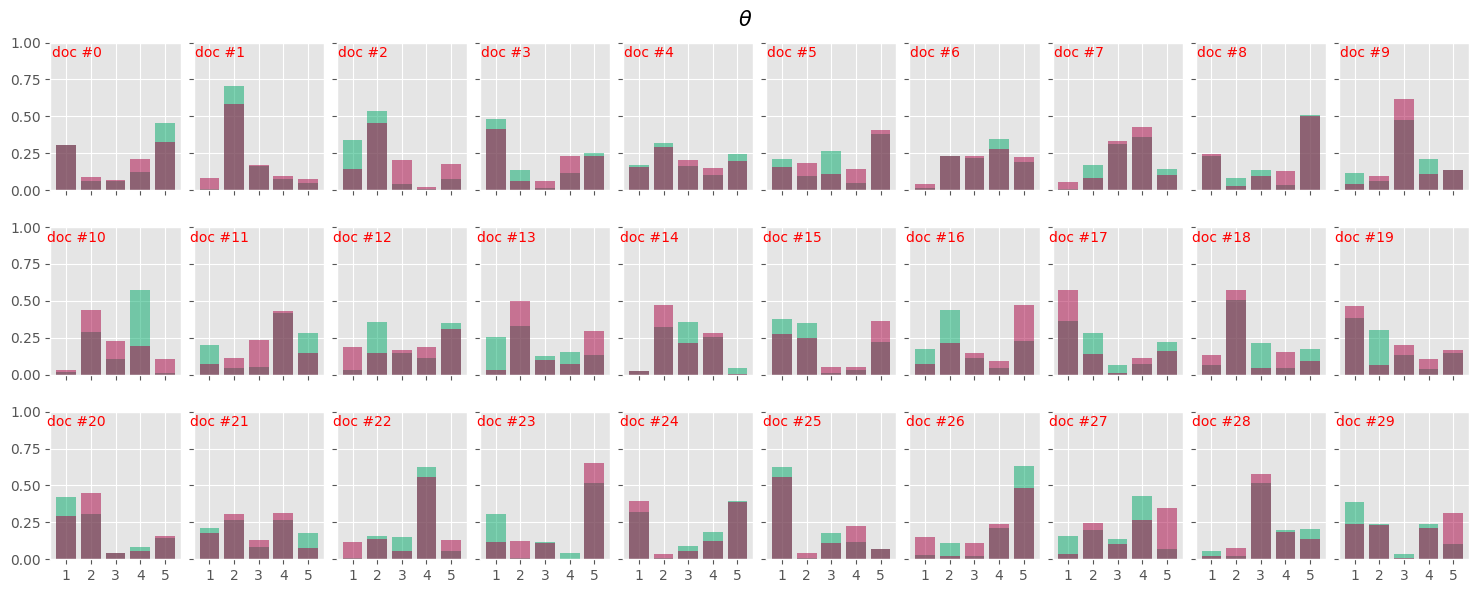

In [10]:
# 真の分布と推定分布の比較（トピック分布）
plot_theta(theta[:30], true_theta[:30], n_rows=3)